In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import numpy as np
from atooms.trajectory import Trajectory
import atooms.postprocessing as pp
from  atooms.postprocessing import api

from datetime import datetime

In [2]:
# trajectory_filename = 'trajectory.xyz'
trajectory_filename = os.path.join(
    os.path.dirname(os.getcwd()),
    'data',
    '2021-02-15',
    'T_2.80453_dt_0.005.xyz'
)


trajectory_filename

'C:\\Users\\farhutdinov.a\\Documents\\Albert\\git_reps\\molecular_dynamics\\data\\2021-02-15\\T_2.80453_dt_0.005.xyz'

In [3]:
trajectory = Trajectory(trajectory_filename)

In [4]:
k_kwargs = {
    'kmin': 0,
    'kmax': 20,
    'ksamples': 1000,
}

In [5]:
def get_grid_and_values(trajectory_filename, parameter):
    grid, values = [], []
    with open(f'{trajectory_filename}.pp.{parameter}') as file:
        for line in file:
            if line.startswith('#'):
                continue
            row = [float(_) for _ in line.rstrip().split()]
            grid.append(row[0])
            values.append(row[1])
    return grid, values

#### Функция радиального распределения (300 шагов за 40 секунд без дополнительных настроек, dr=0.01)

0:01:19.602552


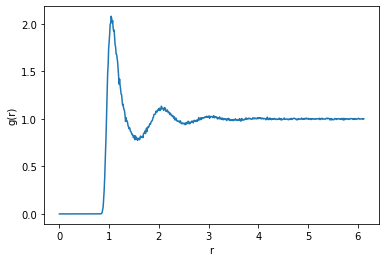

In [6]:
start = datetime.now()

rdf = pp.RadialDistributionFunction(
    trajectory, 
    dr=0.01
)
rdf.do()
plt.plot(rdf.grid, rdf.value)
plt.xlabel("r");
plt.ylabel("g(r)");
print(datetime.now() - start)

#### Статический структурный фактор (300 шагов за 5.5 минут для 1000 значений k от 0 до 20)

In [ ]:
start = datetime.now()

ssf = pp.StructureFactor(
    trajectory,
    **k_kwargs,
)
ssf.do()
plt.plot(ssf.grid, ssf.value)
plt.xlabel("k");
plt.ylabel("S(k)");

print(datetime.now() - start)

#### Среднеквадратичное смещение (300 шагов за 14 секунд)

In [ ]:
start = datetime.now()

msd = pp.MeanSquareDisplacement(trajectory)
msd.do()
plt.plot(
    msd.grid, 
    msd.value, 
)
plt.xlabel("t");
plt.ylabel("MSD(t)");

print(datetime.now() - start)

#### Диффузия Эйнштейна

In [ ]:
start = datetime.now()

msd_grid = np.array(msd.grid[1:])
msd_value = np.array(msd.value[1:])

plt.plot(
    msd_grid, 
    msd_value / 6 / msd_grid, 
)
plt.xlabel("t");
plt.ylabel("MSD(t)");

print(datetime.now() - start)

#### Спектральная плотность (300 шагов за 3 минуты для 1000 значений k от 0 до 20)

In [ ]:
start = datetime.now()

api.ik(
    trajectory_filename,
    **k_kwargs,
)
ik_grid, ik_value = get_grid_and_values(trajectory_filename, 'ik')
print(datetime.now() - start)

In [ ]:
plt.plot(ik_grid, ik_value);
plt.xlabel(r"k");
plt.ylabel(r"I(k)");